# Loan Prediction Project

The goal of this project is predict the eligibility of a customer to recive a loan.

In [5]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=18b2ffe7260430548021c790781aa8d110fa77c8ab0313ecc7336c71b0d4ab3b
  Stored in directory: C:\Users\ajoor\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [419]:
# lbis to be used

import pandas as pd
import numpy as np

from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [420]:
file_path = "C:\\Users\\ajoor\\Desktop\\Projects\LoanPrediction\\Data\\"


file_name1 = "loan_train.csv"
file_name2 = "loan_test.csv"

In [421]:
df1 = pd.read_csv(file_path+file_name1)
df2 = pd.read_csv(file_path+file_name2)

In [422]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [423]:
# Inspecting the first dataframe
print('Shape:', df1.shape)
print ("----------------------------------")
print('Columns:', df1.columns)
print ("----------------------------------")
print ("Gender: ",df1['Gender'].unique())
print ("----------------------------------")
print ("Married: ",df1['Married'].unique())
print ("----------------------------------")
print ("Dependents: ",df1['Dependents'].unique())
print ("----------------------------------")
print ("Education: ",df1['Education'].unique())
print ("----------------------------------")
print ("Self_Employed: ",df1['Self_Employed'].unique())
print ("----------------------------------")
print ("Credit_History: ",df1['Credit_History'].unique())
print ("----------------------------------")
print ("Property_Area: ",df1['Property_Area'].unique())
print ("----------------------------------")
print ("Loan_Status: ",df1['Loan_Status'].unique())
print ("----------------------------------")
print ('     ','n')
print (df1['Loan_Status'].value_counts())
print ("----------------------------------")
print (df1.dtypes)

Shape: (614, 13)
----------------------------------
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
----------------------------------
Gender:  ['Male' 'Female' nan]
----------------------------------
Married:  ['No' 'Yes' nan]
----------------------------------
Dependents:  ['0' '1' '2' '3+' nan]
----------------------------------
Education:  ['Graduate' 'Not Graduate']
----------------------------------
Self_Employed:  ['No' 'Yes' nan]
----------------------------------
Credit_History:  [ 1.  0. nan]
----------------------------------
Property_Area:  ['Urban' 'Rural' 'Semiurban']
----------------------------------
Loan_Status:  ['Y' 'N']
----------------------------------
      n
Y    422
N    192
Name: Loan_Status, dtype: int64
----------------------------------
Loan_ID            

 - Gender, Married, Education, Property_Area, Self_Employed, & Loan_Status should be converted to categorical values.
 - Credit_History, & Dependents categorical ?

In [424]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


- The column loan status does **NOT** exist in df2, and therefore, it will be predicited
- We can combine both dataframes to prepare the data

In [425]:
df1_copy = df1.copy()

In [426]:
df1_copy.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [427]:
y=df1_copy[["Loan_ID","Loan_Status"]]
df1_copy.drop("Loan_Status", axis=1, inplace= True)

In [428]:
df = pd.concat([df1_copy,df2])   # It is important that the order stays the same

In [429]:
df.shape 

(981, 12)

## Dealing with catgorical NaN values

In [430]:
def NanReplacer(column,value):
    df[[column]] = df[[column]].fillna(value=value)
    print(df[column].value_counts())
    

In [431]:
NanReplacer(column='Gender',value= "Un-specified")

Male            775
Female          182
Un-specified     24
Name: Gender, dtype: int64


In [432]:
NanReplacer(column='Married',value= "UnKnown")

Yes        631
No         347
UnKnown      3
Name: Married, dtype: int64


In [433]:
NanReplacer(column='Dependents',value= "UnKnown")

0          545
1          160
2          160
3+          91
UnKnown     25
Name: Dependents, dtype: int64


In [434]:
NanReplacer(column='Self_Employed',value= "UnKnown")

No         807
Yes        119
UnKnown     55
Name: Self_Employed, dtype: int64


In [435]:
NanReplacer(column='Credit_History',value= "UnKnown")

1.0        754
0.0        148
UnKnown     79
Name: Credit_History, dtype: int64


In [436]:
df[["Gender"]] = df[["Gender"]].astype('category')
df[["Married"]] = df[["Married"]].astype('category')
df[["Dependents"]] = df[["Dependents"]].astype('category')
df[["Education"]] = df[["Education"]].astype('category')
df[["Self_Employed"]] = df[["Self_Employed"]].astype('category')
df[["Credit_History"]] = df[["Credit_History"]].astype('category')
df[["Property_Area"]] = df[["Property_Area"]].astype('category')

In [437]:
df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
dtype: object

## Dealing with Numeric NaN values

In [438]:
print ('                       ','n')
print("ApplicantIncome:       ",df["ApplicantIncome"].isna().sum())
print("CoapplicantIncome:     ",df["CoapplicantIncome"].isna().sum())
print("LoanAmount:            ",df["LoanAmount"].isna().sum())
print("Loan_Amount_Term:      ",df["Loan_Amount_Term"].isna().sum())


                        n
ApplicantIncome:        0
CoapplicantIncome:      0
LoanAmount:             27
Loan_Amount_Term:       20


In [439]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,142.511530,342.201873
std,5695.104533,2718.772806,77.421743,65.100602
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,100.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,162.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [440]:
df[["LoanAmount"]] = df[["LoanAmount"]].fillna(value=df.LoanAmount.median()) # replace NaNs with median value
df[["Loan_Amount_Term"]] = df[["Loan_Amount_Term"]].fillna(value=df.Loan_Amount_Term.median()) # replace with mode value

In [441]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.057085,342.564730
std,5695.104533,2718.772806,76.395592,64.482011
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,101.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,160.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [442]:
# Inspecting the first dataframe
print('Shape:', df.shape)
print ("----------------------------------")
print('Columns:', df.columns)
print ("----------------------------------")
print ("Gender: ",df['Gender'].unique())
print ("----------------------------------")
print ("Married: ",df['Married'].unique())
print ("----------------------------------")
print ("Dependents: ",df['Dependents'].unique())
print ("----------------------------------")
print ("Education: ",df['Education'].unique())
print ("----------------------------------")
print ("Self_Employed: ",df['Self_Employed'].unique())
print ("----------------------------------")
print ("Credit_History: ",df['Credit_History'].unique())
print ("----------------------------------")
print ("Property_Area: ",df['Property_Area'].unique())
print ("----------------------------------")
print (df.dtypes)

Shape: (981, 12)
----------------------------------
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
----------------------------------
Gender:  [Male, Female, Un-specified]
Categories (3, object): [Male, Female, Un-specified]
----------------------------------
Married:  [No, Yes, UnKnown]
Categories (3, object): [No, Yes, UnKnown]
----------------------------------
Dependents:  [0, 1, 2, 3+, UnKnown]
Categories (5, object): [0, 1, 2, 3+, UnKnown]
----------------------------------
Education:  [Graduate, Not Graduate]
Categories (2, object): [Graduate, Not Graduate]
----------------------------------
Self_Employed:  [No, Yes, UnKnown]
Categories (3, object): [No, Yes, UnKnown]
----------------------------------
Credit_History:  [1, 0, UnKnown]
Categories (3, object): [1, 0, UnKnown]
-----------------

In [443]:
Dependents = []
for index,row in df.iterrows():
    
    if (row["Dependents"]=="0"):
        Dependents.append("None")
    elif (row["Dependents"]=="1"):
        Dependents.append("One")
    elif (row["Dependents"]=="2"):
        Dependents.append("two")
    elif (row["Dependents"]=="3+"):
        Dependents.append("More than three")
    else:
        Dependents.append("Unkown")


In [444]:
CreditHist = []

for index,row in df.iterrows():
    
    if (row["Credit_History"]==0):
        CreditHist.append("Bad")
    elif (row["Credit_History"]==1):
        CreditHist.append("Good")
    else:
        CreditHist.append("Unkown")

In [445]:
df['Dependents'] = Dependents

In [446]:
df['Credit_History'] = CreditHist

In [447]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,None,Graduate,No,5849,0.0,126.0,360.0,Good,Urban
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural


## Spliting Back data:

In [448]:
train = pd.merge(df,y, how='inner')
test = df[len(y):len(df)]

In [449]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,None,Graduate,No,5849,0.0,126.0,360.0,Good,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural,N
2,LP001005,Male,Yes,None,Graduate,Yes,3000,0.0,66.0,360.0,Good,Urban,Y
3,LP001006,Male,Yes,None,Not Graduate,No,2583,2358.0,120.0,360.0,Good,Urban,Y
4,LP001008,Male,No,None,Graduate,No,6000,0.0,141.0,360.0,Good,Urban,Y


In [450]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,None,Graduate,No,5720,0.0,110.0,360.0,Good,Urban
1,LP001022,Male,Yes,One,Graduate,No,3076,1500.0,126.0,360.0,Good,Urban
2,LP001031,Male,Yes,two,Graduate,No,5000,1800.0,208.0,360.0,Good,Urban
3,LP001035,Male,Yes,two,Graduate,No,2340,2546.0,100.0,360.0,Unkown,Urban
4,LP001051,Male,No,None,Not Graduate,No,3276,0.0,78.0,360.0,Good,Urban


In [451]:
train.to_csv(file_path+"df.csv") # Exported to be analyzed with R

## R Summary:

**See the Visualiztion notbook**

According to Graphs: **Educated married males** with **good** credit history who are **not self employed** and with **zero dependents** are prefered the most.

In [140]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [317]:
train.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,5849,0.0,126.0,360.0,Male,No,None,Graduate,No,Good,Urban,Y
1,LP001003,4583,1508.0,128.0,360.0,Male,Yes,One,Graduate,No,Good,Rural,N


In [253]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,None,Graduate,No,5720,0.0,110.0,360.0,Good,Urban
1,LP001022,Male,Yes,One,Graduate,No,3076,1500.0,126.0,360.0,Good,Urban


## Machine Learning (Logistic Regression):

In [782]:
train_df = train[["Loan_ID",'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

test_df = test[["Loan_ID",'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

In [812]:
predictor = train[['Loan_ID','Loan_Status']]

In [784]:
df = pd.concat([train_df,test_df])

In [785]:
df1 = df[['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
df2 = df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]


In [786]:
encode = LabelEncoder()
encoder_dict = defaultdict(LabelEncoder)

In [787]:
labeled_df = df2[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

In [788]:
labeled_df = labeled_df.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [789]:
inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)
#labeled_df.apply(inverse_transform_lambda)

In [790]:
labeled_df['Loan_ID']=df2['Loan_ID']

In [791]:
df = pd.merge(df1,labeled_df, how='inner')

In [792]:
df.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001002,5849,0.0,126.0,360.0,1,0,1,0,0,1,2
1,LP001003,4583,1508.0,128.0,360.0,1,2,2,0,0,1,0


In [793]:
X = df.iloc[:, :].values
X = X

In [794]:
x = X[:, 1:]
y = train.iloc[:, 12].values
print([x[0:5]])
print(x.shape)
print([y[0:5]])

[array([[5849, 0.0, 126.0, 360.0, 1, 0, 1, 0, 0, 1, 2],
       [4583, 1508.0, 128.0, 360.0, 1, 2, 2, 0, 0, 1, 0],
       [3000, 0.0, 66.0, 360.0, 1, 2, 1, 0, 2, 1, 2],
       [2583, 2358.0, 120.0, 360.0, 1, 2, 1, 1, 0, 1, 2],
       [6000, 0.0, 141.0, 360.0, 1, 0, 1, 0, 0, 1, 2]], dtype=object)]
(981, 11)
[array(['Y', 'N', 'Y', 'Y', 'Y'], dtype=object)]


In [796]:
unchagned = x[:, :-7]
to_be_hotcoded = x[:, 4:]

In [798]:
to_be_hotcoded.shape

(981, 7)

In [799]:
unchagned.shape

(981, 4)

In [800]:
onehotencoder = OneHotEncoder(categories='auto')
hotcoded = onehotencoder.fit_transform(to_be_hotcoded).toarray()

In [801]:
hotcoded.shape

(981, 22)

In [802]:
final_array = np.concatenate((unchagned,hotcoded),axis=1)

In [803]:
final_array.shape

(981, 26)

In [804]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [805]:
scaled_df = Scaler.fit_transform(final_array)

In [807]:
scaled_df.shape

In [815]:
scaled_df

array([[ 0.12, -0.59, -0.21, ..., -0.65, -0.74,  1.37],
       [-0.1 , -0.03, -0.18, ...,  1.54, -0.74, -0.73],
       [-0.38, -0.59, -1.  , ..., -0.65, -0.74,  1.37],
       ...,
       [-0.34,  0.14, -0.21, ..., -0.65,  1.35, -0.73],
       [-0.03,  0.29,  0.21, ...,  1.54, -0.74, -0.73],
       [ 0.71, -0.59, -0.58, ...,  1.54, -0.74, -0.73]])

In [817]:
train = scaled_df[:len(predictor)]
test = scaled_df[len(predictor):len(scaled_df)]

In [830]:
Predictor_label = LabelEncoder().fit_transform(y)
y = Predictor_label.reshape(614,1)

In [836]:
train_array = np.concatenate((train,y),axis=1)

In [837]:
S_train , S_test = train_test_split(train_array,test_size=0.20,random_state=2020)

In [838]:
S_test.shape

(123, 27)

In [839]:
train_X = S_train[:, :-1]
train_Y = S_train[:, 26]

test_X = S_test[:, :-1]
test_Y = S_test[:, 26]

In [840]:
train_X.shape

(491, 26)

In [841]:
model = LogisticRegression(solver="liblinear",multi_class='auto')

In [842]:
Lr = model.fit(train_X,train_Y)

In [843]:
yhat = Lr.predict(test_X)

In [844]:
yhat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1.])

In [845]:
print('\nAccuracy Score:', accuracy_score(test_Y,yhat))
print('f1 Score:', f1_score(test_Y, yhat, average='weighted'))
print('jaccard Score:', jaccard_score(test_Y, yhat, average='weighted'))


Accuracy Score: 0.8048780487804879
f1 Score: 0.7803044195855491
jaccard Score: 0.659630727148393


In [846]:
def plot_confusion_matrix(cm, cat, cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(cat))
    plt.xticks(tick_marks, cat, rotation=90)
    plt.yticks(tick_marks, cat)
    plt.axis('scaled')
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       0.89      0.42      0.57        38
         1.0       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123



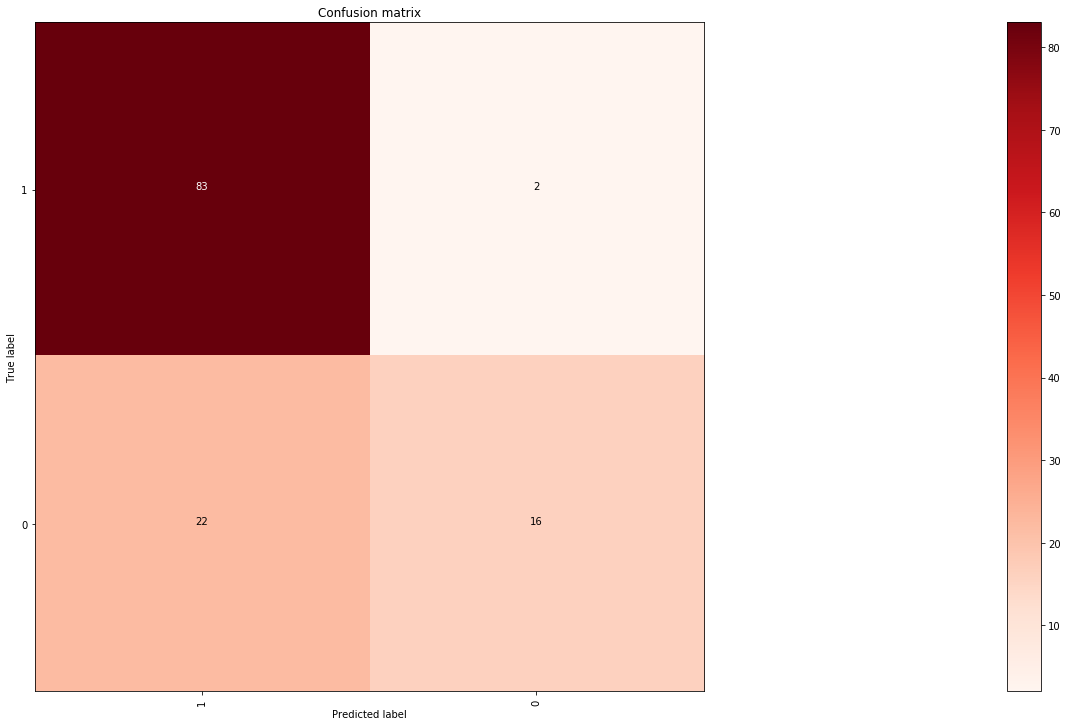

In [847]:
#Compute confusion matrix

cnf_matrix = confusion_matrix(test_Y, yhat, labels=[1,0])
np.set_printoptions(precision=2)
print (classification_report(test_Y, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix,cat=[1,0])

## Predicting 

In [858]:
yhat2 = Lr.predict(test)

In [866]:
yhat2 = pd.DataFrame(yhat2, columns=['Loan_Status'])

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [860]:
Loan_Status = []

for index,row in yhat2.iterrows():
    
    if (row["Loan_Status"]==1.0):
        Loan_Status.append("Y")
    else:
        Loan_Status.append("N")

In [864]:
yhat2 ['Loan_Status'] = Loan_Status
yhat2 ['Loan_ID'] = test_df['Loan_ID'].values

In [876]:
Submission = yhat2[['Loan_ID','Loan_Status']]

In [877]:
Submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [878]:
Submission.to_csv(file_path+"Submission.csv", index=False)